<a href="https://colab.research.google.com/github/karimahagstn/latihan_1/blob/main/ml_Ensemble_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
           'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

df = pd.read_csv(url, names=columns)

print(df.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [2]:
df.to_csv('pima_diabetes.csv', index=False)

from google.colab import files
files.download('pima_diabetes.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
import pandas as pd

# Ganti 'pima_diabetes.csv' dengan nama file CSV kamu
df = pd.read_csv('pima_diabetes.csv')

# Kalau file CSV kamu belum ada header, beri nama kolom seperti ini:
df.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
              'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Cek 5 data teratas
print(df.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [4]:
X = df.drop('Outcome', axis=1)  # fitur
y = df['Outcome']               # target


In [5]:
from sklearn.model_selection import train_test_split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression

# Buat model dasar
rf = RandomForestClassifier(n_estimators=100, random_state=42)
ada = AdaBoostClassifier(n_estimators=50, random_state=42)
lr = LogisticRegression(max_iter=1000)

# Buat model ensemble Voting (soft voting = berdasarkan probabilitas)
voting_clf = VotingClassifier(estimators=[('rf', rf), ('ada', ada), ('lr', lr)], voting='soft')


In [7]:
voting_clf.fit(X_train, y_train)


VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('ada', AdaBoostClassifier(random_state=42)),
                             ('lr', LogisticRegression(max_iter=1000))],
                 voting='soft')

In [8]:
from sklearn.metrics import accuracy_score, classification_report

# Prediksi hasil pada data testing
y_pred = voting_clf.predict(X_test)

# Hitung akurasi
print("Accuracy:", accuracy_score(y_test, y_pred))

# Laporan lengkap (precision, recall, f1-score)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7662337662337663

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82        99
           1       0.67      0.67      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



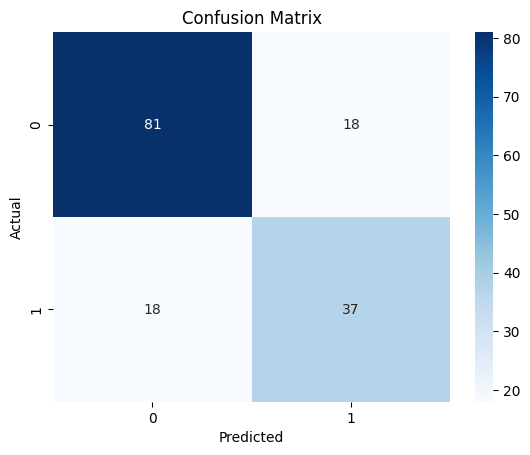

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
